# Individuals

Individual-focused simulations calculate variables for hypothetical, manually specified people, benefit units and households. This can be useful for different applications:
- Calculating taxes and benefits for a specific group
- Evaluating how the computed variables change when one property is varied

## Example: calculating the effective marginal tax rate schedule

In this example, we specify the input data being a lone parent with one child. By setting the ```employment_income``` field to vary (by default, between £0 and £200k) we can plot the line graph of earnings against the effective marginal tax rate. 

Note that ```claims_child_benefit``` is required here to inform takeup determination. Other benefits, such as Universal Credit, change how the graph looks.

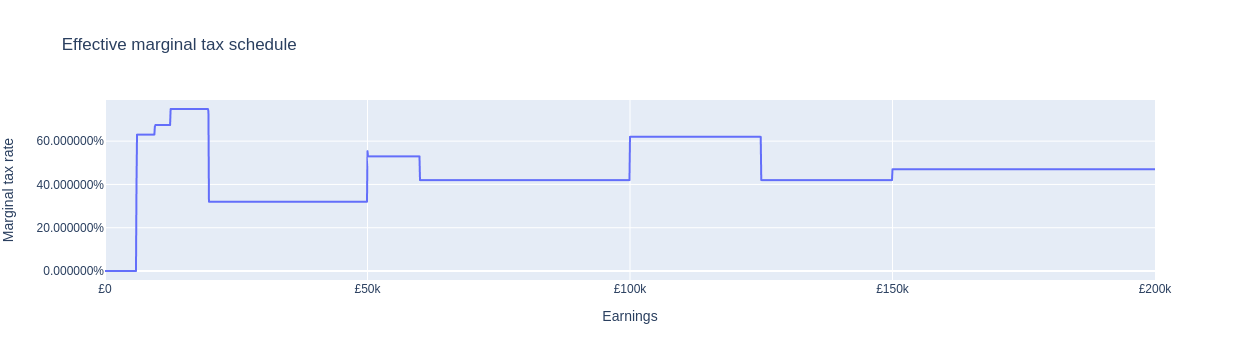

In [5]:
from openfisca_uk import IndividualSim
import plotly.express as px

# define the simulation and populate it

sim = IndividualSim()
sim.add_person(
    name="parent", age=24, is_benunit_head=True, is_household_head=True
)
sim.add_person(name="child", age=2)
sim.add_benunit(
    adults=["parent"],
    children=["child"],
    claims_child_benefit=True,
    claims_UC=True,
    claims_legacy_benefits=False,
)
sim.add_household(adults=["parent"], children=["child"])

# replicate the simulation along the earnings dimension

sim.vary("employment_income", min=0, max=200000, step=100)

# retrive the arrays of earnings and marginal tax rates

earnings = sim.calc("employment_income", target="parent")
mtr = 1 - sim.deriv("household_net_income", wrt_target="parent")

# plot the results

fig = px.line(x=earnings, y=mtr, title="Effective marginal tax schedule")
fig.update_layout(
    yaxis_tickformat="%",
    xaxis_tickprefix="£",
    xaxis_title="Earnings",
    yaxis_title="Marginal tax rate",
)
fig.show()